In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import math
import scipy.fft

In [2]:
vhdl = np.loadtxt('output_file.txt')
plt.plot(vhdl)

In [2]:
f_signal = 0.1  # en Hz
fs_in = 1e3  # en Hz

Ts = 1/fs_in  # segundos - Definir el tiempo de muestreo
t_total = 10  # segundos - Definir el tiempo total de la señal
t = np.arange(0, t_total, Ts)  # Generar el vector de tiempo

# Crear la señal discreta del seno
y = np.sin(2*np.pi*f_signal*t)
plt.plot(t, y)

nfft = y.size
fft_mod = (1/nfft)*np.abs(scipy.fft.fft(y)[:nfft//2])
plt.figure()
plt.semilogx(fft_mod)

print(np.max(fft_mod))

0.5


In [3]:
# Definir la frecuencia de la señal sinusoidal y la frecuencia de muestreo
f_signal = 0.1  # en Hz
fs_in = 1e3  # en Hz

Ts = 1/fs_in  # segundos - Definir el tiempo de muestreo
t_total = 10  # segundos - Definir el tiempo total de la señal
t = np.arange(0, t_total, Ts)  # Generar el vector de tiempo

# Crear la señal discreta del seno
sin = np.sin(2*np.pi*f_signal*t)

SNR = 15;
Ps = np.mean(np.power(sin, 2))
Pn = Ps / (np.power(10, (SNR/10)))
noise = math.sqrt(Pn) * np.random.randn(len(sin))
noisy_signal = sin + noise

print(len(sin))

# Graficar la señal sinusoidal
plt.plot(t, noisy_signal)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

10000


In [4]:
file = "noisy_signal.txt"
with open(file, "w") as f:
    for i in range(len(noisy_signal)):
        f.write(str(noisy_signal[i]))
        f.write("\n")

In [5]:
b = np.array([-0.000104727467330348859462715860324522055,
-0.000392074744998403314222290561019690358,
-0.000781715557635020508522871729439884803,
-0.00147668595952192647363654387504539045, 
-0.0024103367236310464793991314991217223,  
-0.003620416280096990305215065575339394854,
-0.005004144859511363424564578394893032964,
-0.006424705176368399224540173264585973811,
-0.00764111056876326522058207046939060092, 
-0.008349346880155098654663348156645952258,
-0.008185117603058469915033867891906993464,
-0.006769503914956541586189775472348628682,
-0.003750602374476772523509415790954335534,
 0.001139480059234831890030426038151745161,
 0.008033174150323582271560063361448555952,
 0.016882754688886700972227927763924526516,
 0.027433523680081089990423492963600438088,
 0.039220331323394204414700681127214920707,
 0.051590887374392463415873066878702957183,
 0.063755750725587256866333518701139837503,
 0.074860229325539123790278495107486378402,
 0.084070156970805984264494270519207930192,
 0.090660968225924981611640873779833782464,
 0.094098184868813189440928113072004634887,
 0.094098184868813189440928113072004634887,
 0.090660968225924981611640873779833782464,
 0.084070156970805984264494270519207930192,
 0.074860229325539123790278495107486378402,
 0.063755750725587256866333518701139837503,
 0.051590887374392463415873066878702957183,
 0.039220331323394204414700681127214920707,
 0.027433523680081089990423492963600438088,
 0.016882754688886700972227927763924526516,
 0.008033174150323582271560063361448555952,
 0.001139480059234831890030426038151745161,
-0.003750602374476772523509415790954335534,
-0.006769503914956541586189775472348628682,
-0.008185117603058469915033867891906993464,
-0.008349346880155098654663348156645952258,
-0.00764111056876326522058207046939060092, 
-0.006424705176368399224540173264585973811,
-0.005004144859511363424564578394893032964,
-0.003620416280096990305215065575339394854,
-0.0024103367236310464793991314991217223,  
-0.00147668595952192647363654387504539045,
-0.000781715557635020508522871729439884803,
-0.000392074744998403314222290561019690358,
-0.000104727467330348859462715860324522055])


# Frecuencia de muestreo deseada para la señal de salida
fs_out = 1

# Factor de decimación
q = int(fs_in / fs_out)

# Decimar la señal de entrada
filtered_signal = signal.lfilter(b, 1.0, noisy_signal)
decimated_signal = filtered_signal[::10]
filtered2 = signal.lfilter(b, 1.0, decimated_signal)
output_signal = filtered2[::10]


file = "signal_filtered_py.txt"
with open(file, "w") as f:
    for i in range(len(filtered_signal)):
        f.write(str(filtered_signal[i]))
        f.write("\n")
        
file = "signal_decimated_py.txt"
with open(file, "w") as f:
    for i in range(len(decimated_signal)):
        f.write(str(decimated_signal[i]))
        f.write("\n")
print(len(decimated_signal))

# SNR signal filtered
P_signal_filtered = np.mean(np.power(filtered_signal, 2))
P_noise_filtered = np.mean(np.power(noisy_signal - filtered_signal, 2))
SNR_filtered_db = 10 * np.log10(P_signal_filtered / P_noise_filtered)
print("SNR filtrada:", SNR_filtered_db)

# SNR signal decimated
P_signal_decimated = np.mean(np.power(decimated_signal, 2))
P_noise_decimated = P_signal_filtered / (np.power(10, (SNR/10)))
SNR_decimated_db = 10 * np.log10(P_signal_decimated / P_noise_decimated)
print("SNR decimada:", SNR_decimated_db)

1000
SNR filtrada: 14.473340388268074
SNR decimada: 14.999881184473159


In [9]:
vhdl = np.loadtxt('output_file.txt')

dif = vhdl - output_signal


# Graficar señal de entrada y salida
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
#fig5, ax5 = plt.subplots()

ax1.plot(noisy_signal)
ax1.set_xlabel('Samples')
ax1.set_ylabel('Amplitud')
ax1.set_title('Noisy signal')

ax2.plot(output_signal, 'g')
ax2.set_xlabel('Samples')
ax2.set_ylabel('Amplitud')
ax2.set_title('Filtered signal')

ax3.plot(vhdl, 'r')
ax3.set_xlabel('Samples')
ax3.set_ylabel('Amplitud')
ax3.set_title('Decimated signal')

ax4.plot(dif, 'y')
ax4.set_xlabel('Samples')
ax4.set_ylabel('Amplitud')
ax4.set_title('Second filter')

#ax5.plot(output_signal, 'y')
#ax5.set_xlabel('Samples')
#ax5.set_ylabel('Amplitud')
#ax5.set_title('Output signal')

max_py = max(filtered_signal)
max_vhdl = max(vhdl)
print(np.argmax(filtered_signal))
print(np.argmax(vhdl))

ValueError: operands could not be broadcast together with shapes (10000,) (100,) 

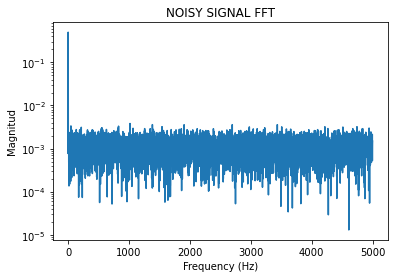

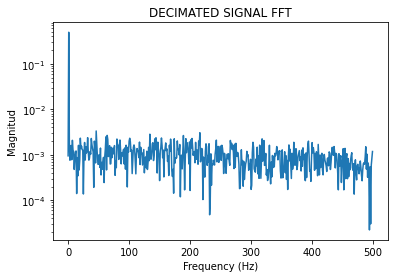

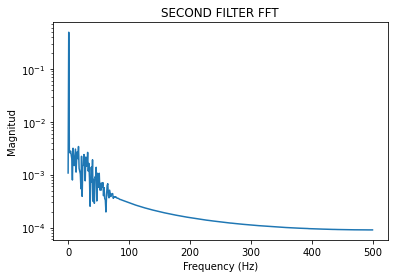

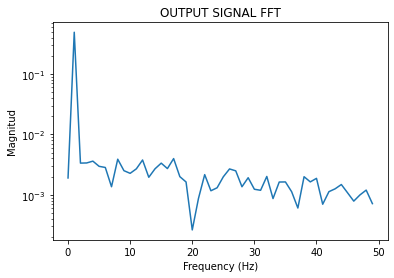

In [9]:
# Calcular la transformada de Fourier de la señal
nfft_noisy = noisy_signal.size
fft_mod_noisy = (1/nfft_noisy)*np.abs(scipy.fft.fft(noisy_signal)[:nfft_noisy//2])

nfft_filtered = filtered_signal.size
fft_mod_filtered = (1/nfft_filtered)*np.abs(scipy.fft.fft(filtered_signal)[:nfft_filtered//2])

nfft_decimated = decimated_signal.size
fft_mod_decimated = (1/nfft_decimated)*np.abs(scipy.fft.fft(decimated_signal)[:nfft_decimated//2])

nfft_filtered_2 = filtered2.size
fft_mod_filtered_2 = (1/nfft_filtered_2)*np.abs(scipy.fft.fft(filtered2)[:nfft_filtered_2//2])

nfft_output = output_signal.size
fft_mod_output = (1/nfft_output)*np.abs(scipy.fft.fft(output_signal)[:nfft_output//2])

#NOISY_FFT = np.fft.fft(noisy_signal)
#FILTERED_FFT = np.fft.fft(filtered_signal)
#DECIMATED_FFT = np.fft.fft(decimated_signal)
#FILTERED2_FFT = np.fft.fft(filtered2)
#OUTPUT_SIGNAL_FFT = np.fft.fft(output_signal)

# Crear los ejes de frecuencia para la visualización
freqs = np.fft.fftfreq(len(t), Ts)
freqs2 = np.fft.fftfreq(len(decimated_signal), Ts*10)
freqs3 = np.fft.fftfreq(len(output_signal), Ts*10*10)

# Graficar señal de entrada y salida
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()

ax1.plot(fft_mod_noisy)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitud')
ax1.set_title('NOISY SIGNAL FFT')
ax1.set_yscale('log')
#ax1.set_xlim([0, 100])
#ax1.set_yscale('log')

ax2.plot(fft_mod_filtered)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitud')
ax2.set_title('FILTERED SIGNAL FFT')
#ax2.set_xlim([0, 100])
ax2.set_yscale('log')

ax3.plot(fft_mod_decimated)
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Magnitud')
ax3.set_title('DECIMATED SIGNAL FFT')
ax3.set_yscale('log')
#ax3.set_xlim(0, 100)

ax4.plot(fft_mod_filtered_2)
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Magnitud')
ax4.set_title('SECOND FILTER FFT')
ax4.set_yscale('log')
#ax4.set_xlim(0, 100)

ax5.plot(fft_mod_output)
ax5.set_xlabel('Frequency (Hz)')
ax5.set_ylabel('Magnitud')
ax5.set_title('OUTPUT SIGNAL FFT')
ax5.set_yscale('log')

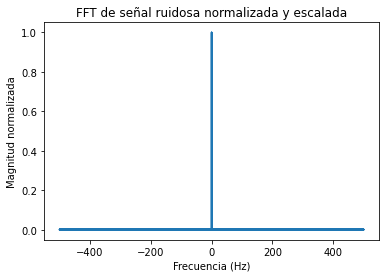

In [19]:
# Calcular la FFT de la señal ruidosa
fft = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(t), 1/fs_in)

# Normalizar y escalar la FFT
fft_norm = np.abs(fft) / len(fft) * 2  # Normalización y escala
amplitude = np.max(fft_norm)  # Amplitud máxima de la FFT
fft_norm = fft_norm / amplitude  # Escala para que la amplitud máxima sea 1

# Graficar la FFT normalizada y escalada
plt.plot(freqs, fft_norm)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud normalizada')
plt.title('FFT de señal ruidosa normalizada y escalada')
plt.show()